대학원 입학 예측

In [18]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
# 대학원 입학 예측 데이터 불러오기
df = pd.read_csv('admission_predict.csv', sep=",", index_col=0)
df.head()
# 상위 5개 출력

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


In [19]:
# 결측치 판별. 없음
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

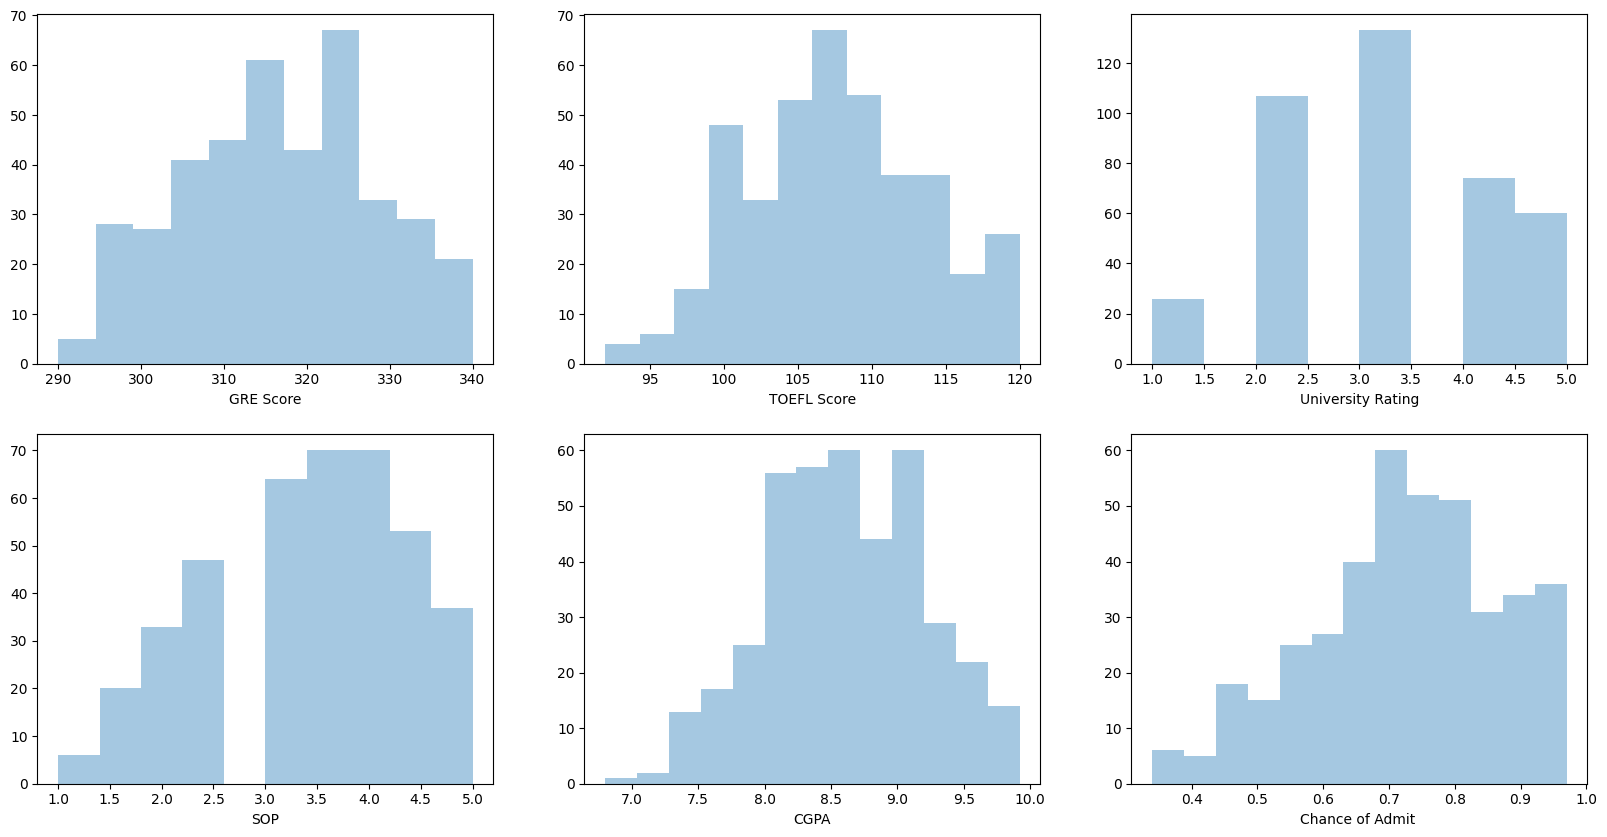

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axs = plt.subplots(ncols = 3, nrows = 2, figsize = (20,10))

# 데이터 시각화. 행3, 열2로 나타냄.
sns.distplot(df['GRE Score'], kde=False, ax=axs[0,0])
# axs[0,0].set_title("Distribution of GRE Scores")
sns.distplot(df['TOEFL Score'], kde=False, ax=axs[0,1])
# axs[0,0].set_title("Distribution of GRE Scores")
sns.distplot(df['University Rating'], kde=False, ax=axs[0,2])
# axs[0,0].set_title("Distribution of GRE Scores")
sns.distplot(df['SOP'], kde=False, ax=axs[1,0])
# axs[0,0].set_title("Distribution of GRE Scores")
sns.distplot(df['CGPA'], kde=False, ax=axs[1,1])
# axs[0,0].set_title("Distribution of GRE Scores")
sns.distplot(df['Chance of Admit '], kde=False, ax=axs[1,2])
# axs[0,0].set_title("Distribution of GRE Scores")

plt.show()

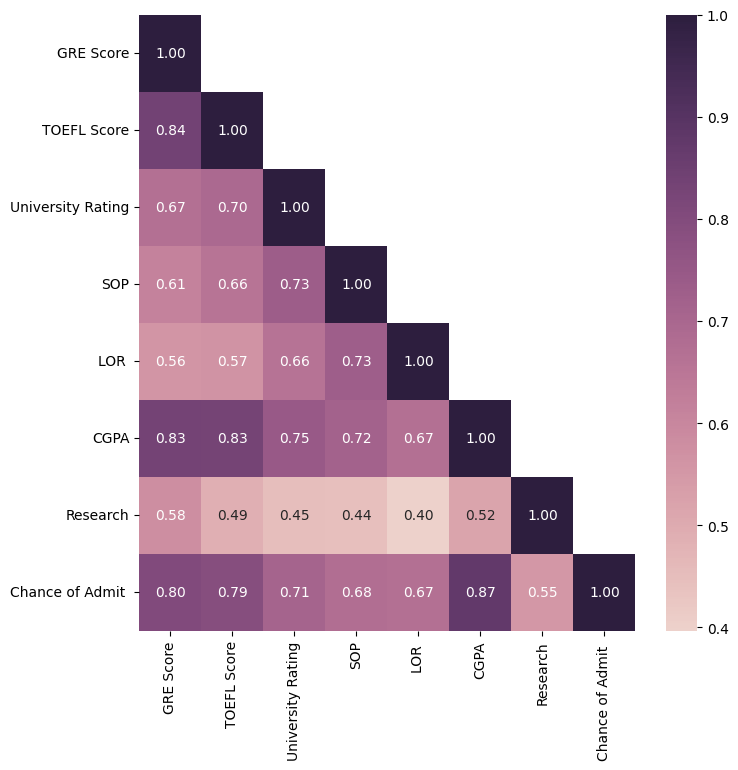

In [21]:
# heatmap 데이터 시각화.
import numpy as np
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool), k=1)

fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(corr, cmap = sns.cubehelix_palette(as_cmap = True), annot = True, fmt = ".2f",mask=mask)
plt.show()

In [22]:
from sklearn.model_selection import train_test_split

# Chance of Admit 이 결과값, train. text 나눠서 모델 생성
# train과 test 를 나누기. 전체 데이터의 20%가 test 세트.
X = df.drop(['Chance of Admit '], axis=1)
y = df['Chance of Admit ']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, shuffle = True)

print(X.shape, y.shape)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(400, 7) (400,)
(320, 7) (320,)
(80, 7) (80,)


In [23]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
# 선형 회귀 모델 학습, 테스트 데이터셋에 대해 예측
model = LinearRegression()
model.fit(X_train, y_train)

prediction = model.predict(X_test)
# 실제값과 예측 값을 비교
print(np.round(prediction , 2))
print(y_test.values)

[0.56 0.57 0.51 0.86 0.96 0.81 0.81 0.53 0.86 0.93 0.49 0.76 0.73 0.73
 0.63 0.68 0.95 0.91 0.71 0.6  0.7  0.67 0.62 0.84 0.91 0.9  0.67 0.63
 0.66 0.83 0.76 0.7  0.64 0.65 0.65 0.97 0.72 0.79 0.94 0.58 0.56 0.52
 0.66 0.6  0.65 0.52 0.7  0.65 0.81 0.81 0.79 0.63 0.94 0.76 0.69 0.88
 1.   0.8  0.87 0.95 0.77 0.97 0.85 0.84 0.68 0.59 0.9  0.74 0.64 0.86
 0.69 0.58 0.97 0.84 0.66 0.65 0.57 0.72 0.77 0.89]
[0.64 0.58 0.51 0.85 0.94 0.87 0.84 0.6  0.88 0.94 0.47 0.74 0.66 0.79
 0.73 0.57 0.89 0.91 0.66 0.48 0.77 0.76 0.65 0.87 0.94 0.92 0.57 0.62
 0.71 0.82 0.79 0.72 0.69 0.71 0.62 0.96 0.63 0.81 0.93 0.42 0.56 0.44
 0.61 0.68 0.71 0.57 0.71 0.71 0.84 0.84 0.81 0.56 0.91 0.52 0.61 0.93
 0.97 0.61 0.9  0.94 0.78 0.94 0.89 0.86 0.69 0.46 0.9  0.73 0.54 0.78
 0.7  0.39 0.95 0.84 0.66 0.64 0.56 0.7  0.8  0.93]


In [24]:
# 작을수록 좋은 성능. 최소화하는 방향으로 모델 학습.
# MSE 계산 (얼마나 예측을 잘 못했는가?)
print(mean_squared_error(y_test, prediction))

0.004398041375917967


In [25]:
# 1에 가까울수록 좋은 성능. score으로 R-squared 계산하고 출력함.
# 얼마나 데이터에 잘 적합되었는가?
# train y의 80%를 x가 설명하고 있다.
print(model.score(X_train, y_train))
# test y의 81%를 x가 설명하고 있다.
print(model.score(X_test, y_test))
# 두 점수가 차이 나지 않으므로 과적합 X

0.7997039988473024
0.8093236931679234


In [26]:
# 선형 회귀 모델에서 테스트 샘플이 어떻게 처리됐는지. 결과 출력
print(X_test.iloc[0])
# 계수(Coefficients): 계수는 독립 변수가 종속 변수에 미치는 영향
print("Coefficients: ", model.coef_)
# 절편(Intercept): 절편은 모든 독립변수들이 0일 때의 예측값
print("Intercept: ",model.intercept_)
# 학습 데이터셋에 대한 예측값과 실제값 사이의 차이를 바탕으로 모델 성능을 점수화하여 출력
print((model.coef_.T@X_test.iloc[0])+model.intercept_)

GRE Score            316.0
TOEFL Score          102.0
University Rating      3.0
SOP                    2.0
LOR                    3.0
CGPA                   7.4
Research               0.0
Name: 57, dtype: float64
Coefficients:  [ 0.00190001  0.00347691  0.00734472 -0.00892982  0.02296657  0.11745608
  0.01748672]
Intercept:  -1.3403245264896273
0.5569739175675901
